In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Data



In [ ]:
from google.colab import drive
# Connect to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data from google drive
reviews=pd.read_csv("/content/drive/My Drive/reviews.txt",header=None)
reviews.reset_index(inplace=True)
reviews.head()

,index,0
0,0,bromwell high is a cartoon comedy . it ran at ...
1,1,story of a man who has unnatural feelings for ...
2,2,homelessness or houselessness as george carli...
3,3,airport starts as a brand new luxury pla...
4,4,brilliant over acting by lesley ann warren . ...


In [ ]:
labels=pd.read_csv("/content/drive/My Drive/labels.txt",header=None)
labels.reset_index(inplace=True)

In [ ]:
data=reviews.merge(labels,on="index")
data.drop("index",axis=1,inplace=True)
data.rename(columns={"0_x":"reviews","0_y":"labels"},inplace=True)

# Show the data
data

,reviews,labels
0,bromwell high is a cartoon comedy . it ran at ...,positive
1,story of a man who has unnatural feelings for ...,negative
2,homelessness or houselessness as george carli...,positive
3,airport starts as a brand new luxury pla...,negative
4,brilliant over acting by lesley ann warren . ...,positive
...,...,...
24995,i saw descent last night at the stockholm fi...,negative
24996,a christmas together actually came before my t...,positive
24997,some films that you pick up for a pound turn o...,negative
24998,working class romantic drama from director ma...,positive


##Data Analysis

In [ ]:
data["labels"].value_counts()

positive    12500
negative    12500
Name: labels, dtype: int64

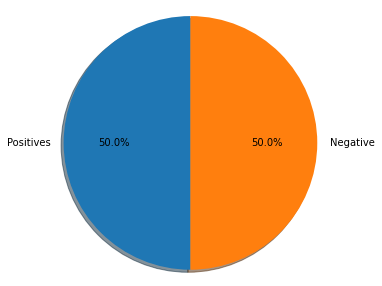

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [data[data["labels"]=="positive"].shape[0], data[data["labels"]=="negative"].shape[0]] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
# Display the chart
plt.show()

**Note:** The data is balance so we can use Accurecy measure 

#Data Pre-processing

### Lowercase 

In [ ]:
data['reviews'] = data.apply(lambda row: row['reviews'].lower(), axis=1) 
data['reviews'].head()

0    bromwell high is a cartoon comedy . it ran at ...
1    story of a man who has unnatural feelings for ...
2    homelessness  or houselessness as george carli...
3    airport    starts as a brand new luxury    pla...
4    brilliant over  acting by lesley ann warren . ...
Name: reviews, dtype: object

### Tokenize

In [ ]:
nltk.download('punkt')

data['reviews'] = data.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
data['reviews'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [bromwell, high, is, a, cartoon, comedy, ., it...
1    [story, of, a, man, who, has, unnatural, feeli...
2    [homelessness, or, houselessness, as, george, ...
3    [airport, starts, as, a, brand, new, luxury, p...
4    [brilliant, over, acting, by, lesley, ann, war...
Name: reviews, dtype: object

### Remove Stopwords

In [ ]:
# get the list of stopwords from nltk library
nltk.download('stopwords')
stopwords_english = stopwords.words('english')

# Some stopwords has an effect in this conext (Sentiment Analysis)
# So we need to remove them from the stopwords list so that they wont be removed from the text
stopwords_english.remove('not')
stopwords_english.remove('but')
stopwords_english.remove('no')
stopwords_english.remove('nor')

# loop through every row in the input data and keep the words that are not in the stop_words list
data['reviews'] = data.apply(lambda row:[word for word in row["reviews"] if word not in stopwords_english ], axis=1)
data['reviews'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [bromwell, high, cartoon, comedy, ., ran, time...
1    [story, man, unnatural, feelings, pig, ., star...
2    [homelessness, houselessness, george, carlin, ...
3    [airport, starts, brand, new, luxury, plane, l...
4    [brilliant, acting, lesley, ann, warren, ., be...
Name: reviews, dtype: object

### Remove punctuation

In [ ]:
data['reviews'] = data.apply(lambda row:[word for word in row["reviews"] if word not in string.punctuation ], axis=1)
data['reviews'].head()

0    [bromwell, high, cartoon, comedy, ran, time, p...
1    [story, man, unnatural, feelings, pig, starts,...
2    [homelessness, houselessness, george, carlin, ...
3    [airport, starts, brand, new, luxury, plane, l...
4    [brilliant, acting, lesley, ann, warren, best,...
Name: reviews, dtype: object

### Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data['reviews'] = data.apply(lambda row:[stemmer.stem(word) for word in row["reviews"]  ], axis=1)
data['reviews'].head()

0    [bromwel, high, cartoon, comedi, ran, time, pr...
1    [stori, man, unnatur, feel, pig, start, open, ...
2    [homeless, houseless, georg, carlin, state, is...
3    [airport, start, brand, new, luxuri, plane, lo...
4    [brilliant, act, lesley, ann, warren, best, dr...
Name: reviews, dtype: object

#Data Statisctics

## Extarct Featuers



Word Count analysis:
	* Mean  :  127.06088
	* Median:  94.0
	* Mode  :  65
	* Max.  :  1486
	* Min.  :  5
	* Std.  :  95.97834488744371


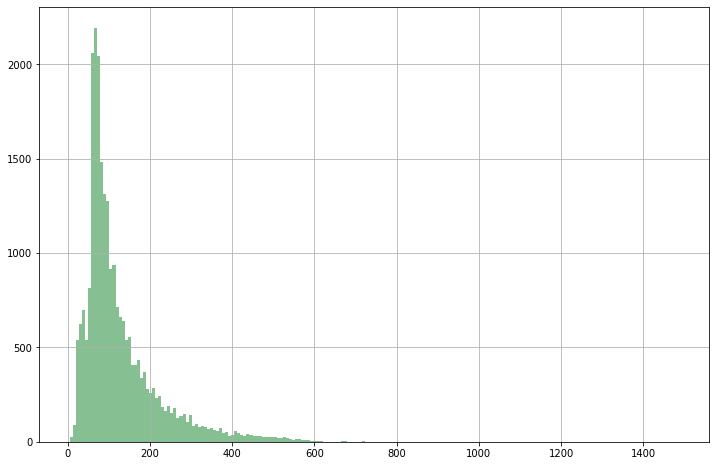

In [ ]:
import seaborn as sns

# A function that appends a column called word_count the input dataframe
def num_of_words(df):
    df['word_count'] = df['reviews'].apply(lambda x : len(str(x).split(" ")))

# Call the method to calculate word_count in every review
num_of_words(data)

# Show statistics about words count 
wc_mean = data['word_count'].mean()
wc_std = data['word_count'].std()

print('Word Count analysis:')
print('\t* Mean  : ', wc_mean)
print('\t* Median: ', data['word_count'].median())
print('\t* Mode  : ', data['word_count'].mode().iat[0])
print('\t* Max.  : ', data['word_count'].max())
print('\t* Min.  : ', data['word_count'].min())
print('\t* Std.  : ', wc_std)

# plot the distribution of the word_count
hist = data['word_count'].hist(bins=200, figsize=(12,8), color='#86bf91')

### Set Sequence length (max_len)

In [ ]:
# Set max_len to mean+3*std
max_len = int(round(wc_mean + 3*wc_std))
 
print('\nWill use max_len=', max_len)


Will use max_len= 415


### Tokenize the input (covert text to sequence)

In [ ]:
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# words that we need to be presented in the output of the tokenizer
stop_words_to_preserve = "not but no nor"

# append the above string 500 times to an empty list
stop_words_list = []
for i in range(500):
    stop_words_list.append(stop_words_to_preserve)

# join
stop_words_to_preserve = ' '.join(stop_words_list)

# make a copy of imput dataframe
df = data.copy();

# add a line that contains the dummy data
df.loc[len(df.index)] = [stop_words_to_preserve, 'positive',1] 


max_features = 5000
tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='1')

tokenizer.fit_on_texts(df['reviews'].values)

#print(tokenizer.texts_to_sequences([stop_words_to_preserve]))


print('---------------')
print(tokenizer.texts_to_sequences(["hello not ok but good kk"]))

X = tokenizer.texts_to_sequences(data['reviews'].values)
X = pad_sequences(X, maxlen=max_len)

print(X)

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('Tokenizer Saved!')

---------------
[[3848, 6, 543, 5, 10, 1]]
[[   0    0    0 ...  154 2861 1492]
 [   0    0    0 ...    1   51 2874]
 [   0    0    0 ...  687  166  348]
 ...
 [   0    0    0 ...    1 1082  561]
 [   0    0    0 ...   20 1237   35]
 [   0    0    0 ...  228    9  480]]
Tokenizer Saved!


### Prepare the Labels

In [ ]:
#Conver the labels from Words(Positive & Negative) into numbers (0 & 1)
dummy = pd.get_dummies(data['labels'])
print(dummy)

Y = pd.get_dummies(data['labels']).values

#Y = dummy['positive']
print(Y)


       negative  positive
0             0         1
1             1         0
2             0         1
3             1         0
4             0         1
...         ...       ...
24995         1         0
24996         0         1
24997         1         0
24998         0         1
24999         1         0

[25000 rows x 2 columns]
[[0 1]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


#Build the Model 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers import Dense, Embedding, GRU, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
import re

In [ ]:
# embed_dim = 32
# lstm_out = 100

# model = Sequential()
# model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(Bidirectional(GRU(lstm_out, dropout=0.2, recurrent_dropout=0.2)))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['binary_accuracy'])
# print(model.summary())

In [ ]:
# embed_dim = 64
# lstm_out = 100

# model = Sequential()
# model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(Bidirectional(GRU(lstm_out, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
# #model.add(Bidirectional(GRU(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['binary_accuracy'])

# print(model.summary())


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 90, input_length=X.shape[1]))

model.add(
    Bidirectional(
    GRU(32, dropout=0.5, recurrent_dropout=0, return_sequences=True,activation='tanh',  recurrent_activation='sigmoid', reset_after=True, use_bias=True, unroll=False )
    )
)
model.add(Bidirectional(GRU(4, dropout=0.5, recurrent_dropout=0, return_sequences=False, activation='tanh',  recurrent_activation='sigmoid', reset_after=True, use_bias=True, unroll=False)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(
    loss=BinaryCrossentropy(from_logits=True), 
    optimizer=adam, 
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 415, 90)           450000    
                                                                 
 bidirectional (Bidirectiona  (None, 415, 64)          23808     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 8)                1680      
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 18        
                                                                 
Total params: 475,506
Trainable params: 475,506
Non-trai

##splite train ,test

In [ ]:
#Split the data into Training & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 28)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state = 92)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_val.shape,Y_val.shape)

(19125, 415) (19125, 2)
(2500, 415) (2500, 2)
(3375, 415) (3375, 2)


##Fit (Train) the model

In [ ]:
batch_size = 256

fit_result = model.fit(X_train, Y_train, epochs = 4, batch_size=batch_size, verbose = 1 , validation_data=(X_val, Y_val)) 

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 19s 91ms/step - loss: 0.5625 - accuracy: 0.7135 - val_loss: 0.4057 - val_accuracy: 0.8347
Epoch 2/4
75/75 [==============================] - 6s 74ms/step - loss: 0.3814 - accuracy: 0.8456 - val_loss: 0.2999 - val_accuracy: 0.8815
Epoch 3/4
75/75 [==============================] - 6s 80ms/step - loss: 0.2872 - accuracy: 0.8874 - val_loss: 0.2920 - val_accuracy: 0.8865
Epoch 4/4
75/75 [==============================] - 6s 75ms/step - loss: 0.2328 - accuracy: 0.9100 - val_loss: 0.3061 - val_accuracy: 0.8794


##Training Results

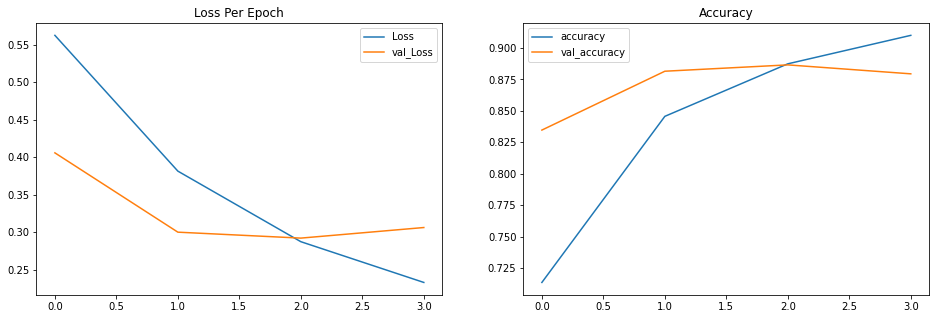

In [ ]:
#make a new figure and setting its dimensions
fig = plt.figure()
fig.set_size_inches(16, 5)

#read required data from model fit history
loss_per_epoch = fit_result.history['loss']
val_loss_per_epoch = fit_result.history['val_loss']
accuracy = fit_result.history['accuracy']
val_accuracy = fit_result.history['val_accuracy']

# plot loss and validation loss
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(len(loss_per_epoch)),loss_per_epoch,label='Loss')
ax.plot(range(len(loss_per_epoch)),val_loss_per_epoch, label='val_Loss')
ax.set_title('Loss Per Epoch')
ax.legend()

# plot accuracy and validation accuracy
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(loss_per_epoch)),accuracy, label='accuracy')
ax.plot(range(len(loss_per_epoch)),val_accuracy, label='val_accuracy')
ax.set_title('Accuracy')
ax.legend()

# display the plot
plt.show()

##validation & test

In [ ]:
# Evaluate Model performance by supplying the validation data
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))


10/10 - 0s - loss: 0.3419 - accuracy: 0.8688 - 393ms/epoch - 39ms/step
score: 0.34
acc: 0.87


## save the model

In [ ]:
# Saving the Model

# serialize model to JSON
model_json = model.to_json()
with open("sentiment_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


#Model In Action

##Load the Model

In [ ]:
from keras.models import model_from_json

# load json data from the file and create model
json_file = open('sentiment_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into the just created model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


##Load the tokenizer

In [ ]:
import pickle

# open the file that was used to save the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    #load the tokenizer from the file
    tokenizer = pickle.load(handle)
    print("Loaded Tokenizer from disk")


Loaded Tokenizer from disk


In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


# methos that uses the trained model in order to analysis a review
def check_sentiment(model, tokenizer, verbose, text):

    # print input text
    print('\r\n------------- Checking a review --------------')
    print('INPUT  :', text)

    # pre-processising
    text = text.lower()
    text = re.sub('[^a-zA-z0-9\s]', '', text)

    #break input string into words (tokens)
    text = word_tokenize(text)

    # get stemmer instance
    stemmer = PorterStemmer()

    #convert every word into its stem
    text = [stemmer.stem(word) for word in text if word not in stopwords_english]
    #print(text)

    # vectorizing the input by the pre-fitted tokenizer instance
    text = tokenizer.texts_to_sequences([text])
    #print(text)

    # padding the input to have exactly the same shape as the input of the model (Set in Training)
    text = pad_sequences(text, maxlen=max_len)

    # Use the model to predict the output
    prediction = model.predict(text)
    #print(prediction)
    prediction = np.argmax(prediction, axis=1)[0]

    if prediction == 0:
        print("RESULT : negative")

    elif prediction == 1:
        print("RESULT : positive")

In [ ]:

verbose = False
check_sentiment(loaded_model, tokenizer, verbose, 'very good people however, very bad service the place is bad')
check_sentiment(loaded_model, tokenizer, verbose, 'fast but bad and horrible')
check_sentiment(loaded_model, tokenizer, verbose, 'bad')
check_sentiment(loaded_model, tokenizer, verbose, 'not bad')
check_sentiment(loaded_model, tokenizer, verbose, 'good')
check_sentiment(loaded_model, tokenizer, verbose, 'not good')
check_sentiment(loaded_model, tokenizer, verbose, 'I loved it, it is amazing woooooo')
check_sentiment(loaded_model, tokenizer, verbose, 'Great place with great coffee. My oat milk latte was delightful, and I appreciated seeing cold brew ice cubes in their cold brew drink!')
check_sentiment(loaded_model, tokenizer, verbose, 'Some new guy just tried to charge me 75 cents for a splash of oat milk in my small drip coffee... i was like "wait you guys charge for splashes of oat milk now? He said yeah, for just a little bit ????? I come here literally every morning. Someone train this guy')



------------- Checking a review --------------
INPUT  : very good people however, very bad service the place is bad
RESULT : negative

------------- Checking a review --------------
INPUT  : fast but bad and horrible
RESULT : negative

------------- Checking a review --------------
INPUT  : bad
RESULT : negative

------------- Checking a review --------------
INPUT  : not bad
RESULT : negative

------------- Checking a review --------------
INPUT  : good
RESULT : positive

------------- Checking a review --------------
INPUT  : not good
RESULT : positive

------------- Checking a review --------------
INPUT  : I loved it, it is amazing woooooo
RESULT : positive

------------- Checking a review --------------
INPUT  : Great place with great coffee. My oat milk latte was delightful, and I appreciated seeing cold brew ice cubes in their cold brew drink!
RESULT : positive

------------- Checking a review --------------
INPUT  : Some new guy just tried to charge me 75 cents for a splash of